In [1]:
from GP_class import GaussianProcessRegressor
import gp_plot
import numpy as np

In [2]:
X = np.arange(-5, 5, 0.2).reshape(-1, 1)
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
def f(x):
    return np.sin(x)
Y_train = f(X_train)
# default is non-noise:
gpr = GaussianProcessRegressor()
gpr.fit(X_train, Y_train)


use scipy minimize to optimize

In [3]:
res = gpr.optim_np()
print(res)

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 0.6864666319124364
        x: [ 2.490e+00  1.660e+00]
      nit: 12
      jac: [ 6.554e-04  1.000e-03]
     nfev: 147
     njev: 49
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


2.4897008908686207 1.6598490423293095


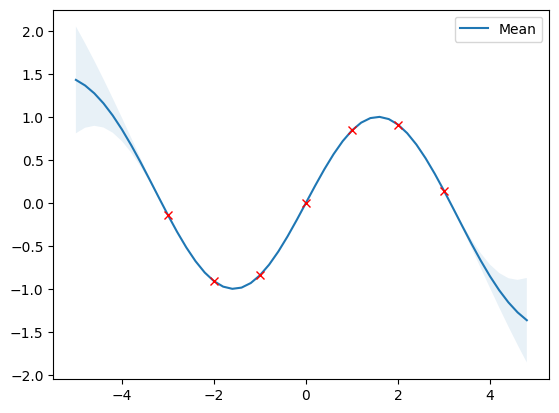

In [4]:
print(gpr.l, gpr.sigma_f)
mu_s, cov_s = gpr.predict(X, return_cov=True)
gp_plot.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, save_path='gaussian_no_noise.pdf')

with noise:

In [5]:
noise = 0.2
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)
Y_train = Y_train.ravel()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 4.352245365493429
        x: [ 1.293e+00  6.387e-01]
      nit: 8
      jac: [-3.020e-06  1.510e-06]
     nfev: 33
     njev: 11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
[-0.07659469 -0.10041192 -0.12915324 -0.16306897 -0.20221389 -0.24641395
 -0.29524709 -0.34803962 -0.40387641 -0.46162024 -0.51993319 -0.57729203
 -0.63199102 -0.68212945 -0.72558742 -0.76000108 -0.78275586 -0.79102151
 -0.78185351 -0.75238036 -0.70008425 -0.62316506 -0.52095602 -0.39433904
 -0.24609095 -0.08108619  0.09371299  0.26952656  0.43630216  0.58350885
  0.70110826  0.78059375  0.8159631   0.80448494  0.7471367   0.64863173
  0.51701023  0.36283389  0.19808578  0.03492401 -0.11554022 -0.24427596
 -0.34504807 -0.41474113 -0.45328333 -0.46322372 -0.44906332 -0.41646523
 -0.37146923 -0.31981461] [[ 3.59407636e-01  3.43454986e-01  3.17547356e-01 ... -5.08501643e-05
  -2.16456732e-05  4.77357673e-07]


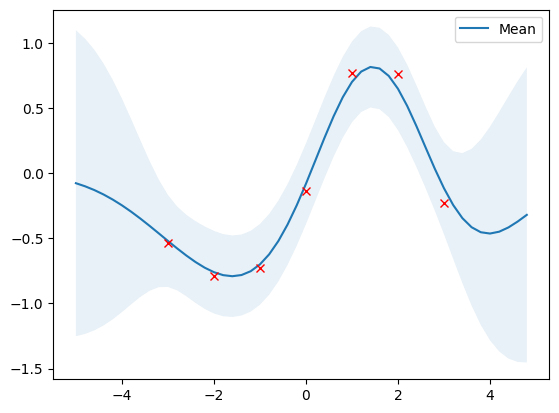

In [6]:
gpr = GaussianProcessRegressor(sigma_y=noise)
gpr.fit(X_train, Y_train)
res = gpr.optim_np()
print(res)
mu_s, cov_s = gpr.predict(X, return_cov=True)
print(mu_s, cov_s)
gp_plot.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, save_path='gaussian_noise.pdf')